In [1]:
import itertools

import numpy
from sympy import init_session

In [2]:
init_session()

IPython console for SymPy 1.0 (Python 2.7.12-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


In [3]:
c = symbols("c0:4")
s = symbols("s0:4")
a = symbols("a0:4")
b = symbols("b0:4")

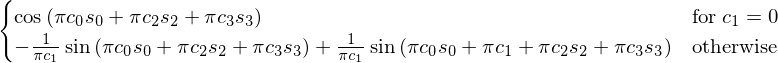

In [29]:
Integral(cos(pi * dot(c, s)), (s[1], 0, 1)).doit()

In [4]:
def dot(es1, es2):
    return sum([e[0]*e[1] for e in zip(es1, es2)])

In [5]:
# Why doesn't sympy do this by itself? Probably some maths thing…
def definize(F, s, a, b):
    return F.subs(s, b) - F.subs(s, a)

In [34]:
def do_integral(f, s):
    return Integral(f, (s, 0, 1)).doit()

In [35]:
da_integral = reduce(do_integral, s[1:], cos(pi * dot(s, c)))

In [18]:
# Copied from OffSwitchCartpole.ipynb.
clipped_high = np.array([2.5, 3.6, 0.28, 3.7])
clipped_low  = -clipped_high
state_ranges = np.array([clipped_low, clipped_high])

clipped_high = np.ones((4))
clipped_low  = np.zeros((4))

In [19]:
bounds_int = da_integral.subs(zip(a[1:], clipped_low[1:])).subs(zip(b[1:], clipped_high[1:]))

In [37]:
bounds_int = da_integral

In [38]:
# Copied from hiora_cartpole.fourier_fa.
order = 3
n_dims = 4
c_matrix = np.array(
               list( itertools.product(range(order+1), repeat=n_dims) ),
               dtype=np.int32)

In [39]:
def sum_term(integral, c, c_vec):
    return integral.subs(zip(c, c_vec))

In [40]:
sum_terms = [sum_term(bounds_int, c, c_vec) for c_vec in c_matrix]

64


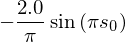

In [56]:
print 4*4*4
sum_terms[4*4*4+1].simplify()

In [47]:
np_sum_terms = [lambdify(s[0], sum_term, 'numpy') for sum_term in sum_terms]

In [48]:
def phi(np_sum_terms, theta, s0):
    ns0 = (s0 - -2.5) / 5.0
    return np.dot(theta, 
                  np.array([npst(ns0) for npst in np_sum_terms]))

In [49]:
theta = np.load("theta.npy")

In [57]:
res = np.array([phi(np_sum_terms, theta[512:768], x) 
 for x in np.arange(-2.38, 2.5, 0.5*1.19)])


In [58]:
res

array([  -129838.63097278,   -298998.59748568,   3087412.84846354,
         8130942.03887799,  10758471.51583669,   8664232.14626823,
         3636646.02919975,   -222434.83286789,   -491482.63696056])

In [59]:
other = np.array([-3748598.374407076,
 -8333255.9176837215,
 92906846.75614552,
 242969379.49722022,
 320543060.70953935,
 257463642.38676718,
 107526913.72252564,
 -7061727.3744605975,
 -14631018.954087665])

In [60]:
res/other

array([ 0.03463658,  0.03588017,  0.03323127,  0.03346488,  0.03356326,
        0.03365225,  0.0338208 ,  0.03149864,  0.03359183])

In [61]:
other/res

array([ 28.87120995,  27.87055186,  30.09213582,  29.88207004,
        29.79447966,  29.71569067,  29.56760511,  31.74739893,  29.76914718])

In [66]:
res2 = np.array([phi(np_sum_terms, theta[768:1024], x) 
 for x in np.arange(-2.38, 2.5, 0.5*1.19)])


In [67]:
res2

array([  -174316.21632421,   -505178.62138594,   2743738.37912048,
         7828381.28926773,  10698118.73072955,   8891660.84160946,
         3996424.61865612,     49410.50215361,   -409740.34118969])

In [68]:
res2*29.5

array([ -5.14232838e+06,  -1.49027693e+07,   8.09402822e+07,
         2.30937248e+08,   3.15594503e+08,   2.62303995e+08,
         1.17894526e+08,   1.45760981e+06,  -1.20873401e+07])

This is strange. Why are the results I get with numeric integration approximately 30 times those of the analytic integration?